# DECISION TREE AND RANDM FOREST

Decision tree - tree where each node represent a feature (attribute), each link(branch) represents decision and each leaf represents an outcome (categorical or continous value) -  classification + regression


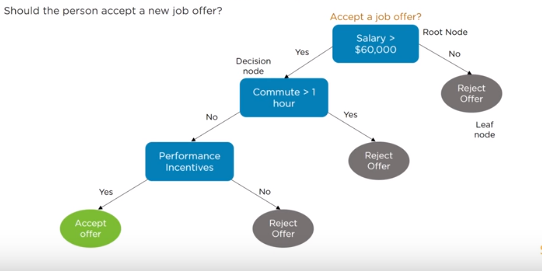

In [14]:
from IPython.display import Image

Image(filename='Pictures/M52.PNG', width=600,height=600)

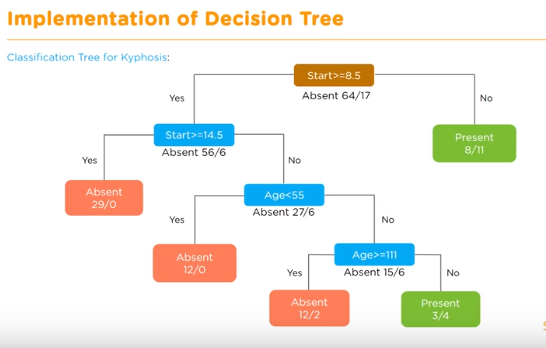

In [15]:
Image(filename='Pictures/M53.PNG', width=600,height=600)

Explanation : 

1. Start = Number is greater that 8.5?
2. Again - if number is greater than 14.5 than we go further
3. Age - if it is greater than 55 we continue


In [16]:
#PYTHON IMPLEMENTATION

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
kyphosis=pd.read_csv('Data/kyphosis.csv')

In [19]:
kyphosis.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


Extracting independet variables

In [20]:
x = kyphosis.drop('Kyphosis', axis=1)

In [23]:
x.head()

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15


Extracting dependent variable

In [24]:
y=kyphosis['Kyphosis']

In [25]:
y.head()

0     absent
1     absent
2    present
3     absent
4     absent
Name: Kyphosis, dtype: object

Variable x - keeps all data needed to conclude result
Variable y - keeps all data that is result of training

DATA ANALYSIS

C:\Users\Hana\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


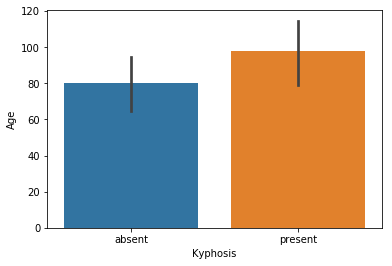

In [26]:
sns.barplot(x='Kyphosis', y='Age', data=kyphosis)

In [27]:
#Visualsing dataset

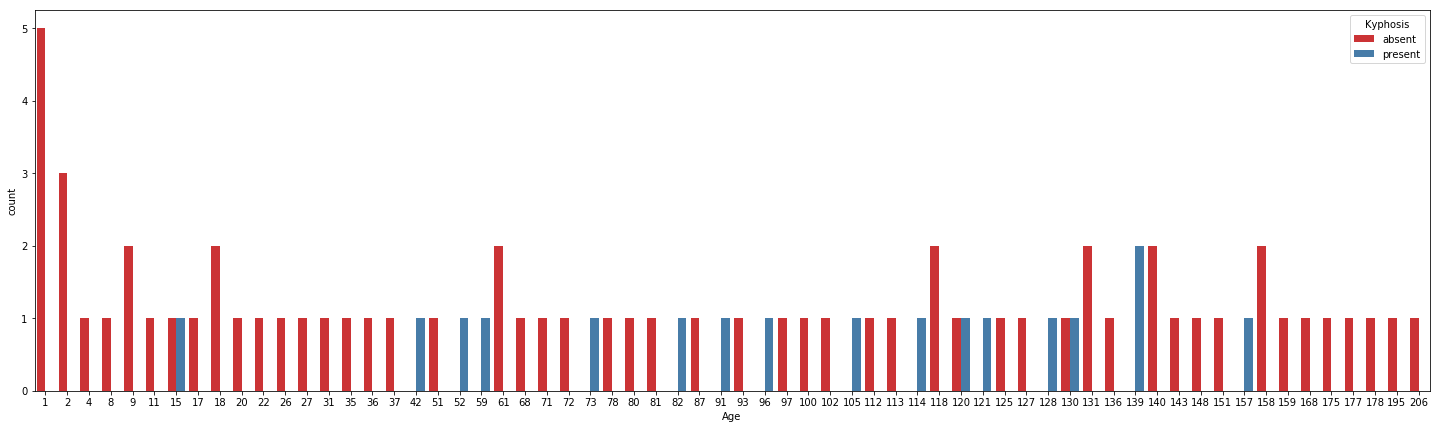

In [28]:
plt.figure(figsize=(25,7))
sns.countplot(x='Age',hue='Kyphosis', data=kyphosis, palette='Set1')

Spliting data to start training model

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=100)

In [30]:
x.head()

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15


In [31]:
y.head()

0     absent
1     absent
2    present
3     absent
4     absent
Name: Kyphosis, dtype: object

TRAINING DECISION TREE

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dtree=DecisionTreeClassifier()

In [34]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

PREDICTING THE RESULTS

In [35]:
predictions=dtree.predict(x_test)
predictions

array(['absent', 'absent', 'present', 'absent', 'present', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'present', 'present', 'absent', 'absent',
       'present', 'present', 'absent', 'absent', 'present', 'absent',
       'present'], dtype=object)

EVALUTATION OF MODEL - MATRIX

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

     absent       0.88      0.64      0.74        22
    present       0.11      0.33      0.17         3

avg / total       0.78      0.60      0.67        25



In [42]:
print(confusion_matrix(y_test, predictions))

[[14  8]
 [ 2  1]]


Računamo:

Sum = 14+8+2+1=25

diagonal=15

In [43]:
Acurracy = 15/25
Acurracy

0.6

RANDOM FOREST

In [46]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\Hana\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [47]:
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
rfc_pred=rfc.predict(x_test)
rfc_pred

array(['absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present'], dtype=object)

EVALUATION OF MATRIX

In [51]:
print(confusion_matrix(y_test, rfc_pred))

[[19  3]
 [ 3  0]]


In [52]:
acc=19/25
acc

0.76

In [53]:
#better prediction

In [55]:
#we can improve prediction with random forest - using multiple trees, and taking average of each tree